# Predictive Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("D:\Projects\Teleco Customer Churn Analysis\Dataset\Analysed Churn Data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Encoding and Scaling Variables

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Droping Unnecessary columns

In [5]:
# Drop unnecessary columns
new_df = df.copy()
df = df.drop(columns=["customerID"])


### Encoding Churn 

In [6]:
# Encode the target variable
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)  # Yes → 1, No → 0

# Separate features and target
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

### One Hot Encoding

In [7]:
columns_to_one_hot = [
    "gender",
    'SeniorCitizen',
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "PaymentMethod"
]  # Columns for One-Hot Encoding

# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(X[columns_to_one_hot])
one_hot_columns = one_hot_encoder.get_feature_names_out(columns_to_one_hot)

### Ordinal Encoding

In [8]:
ordinal_cols = ["Contract"]  # Columns for Ordinal Encoding
# Define the order for ordinal encoding
contract_order = ["Month-to-month", "One year", "Two year"]
# Apply OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[contract_order])
ordinal_encoded = ordinal_encoder.fit_transform(X[ordinal_cols])
ordinal_columns = ordinal_cols  # Names remain the same for ordinal encoding


### Combining both encoded data

In [9]:
# Combine all transformed data with remaining columns
remaining_cols = X.drop(columns=columns_to_one_hot + ordinal_cols)
combined_data = pd.concat(
    [
        pd.DataFrame(one_hot_encoded, columns=one_hot_columns),
        pd.DataFrame(ordinal_encoded, columns=ordinal_columns),
        remaining_cols.reset_index(drop=True),
    ],
    axis=1,
)

### Scaling Features

In [10]:
#Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)
scaled_df = pd.concat([pd.DataFrame(scaled_data, columns=combined_data.columns), pd.DataFrame(y, columns=["Churn"])], axis = 1)

In [11]:
scaled_df

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract,tenure,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,...,-0.796070,0.829798,-0.525047,1.406418,-0.544807,-0.828207,-1.277445,-1.160323,-0.992611,0
1,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,...,-0.796070,-1.205113,-0.525047,-0.711026,1.835513,0.371271,0.066327,-0.259629,-0.172165,0
2,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,...,-0.796070,0.829798,-0.525047,-0.711026,1.835513,-0.828207,-1.236724,-0.362660,-0.958066,1
3,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,...,-0.796070,-1.205113,-0.525047,-0.711026,-0.544807,0.371271,0.514251,-0.746535,-0.193672,0
4,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,...,-0.796070,0.829798,-0.525047,1.406418,-0.544807,-0.828207,-1.236724,0.197365,-0.938874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,0.327438,-0.327438,1.170719,-0.885660,-0.525927,-0.525927,...,1.256171,0.829798,-0.525047,-0.711026,1.835513,0.371271,-0.340876,0.665992,-0.127605,0
7039,-1.009559,-0.439916,1.034530,1.529024,0.327438,-0.327438,1.170719,1.129102,-0.525927,-0.525927,...,1.256171,0.829798,1.904590,-0.711026,-0.544807,0.371271,1.613701,1.277533,2.242606,0
7040,-1.009559,-0.439916,1.034530,1.529024,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,...,-0.796070,0.829798,-0.525047,1.406418,-0.544807,-0.828207,-0.870241,-1.168632,-0.852932,0
7041,0.990532,2.273159,1.034530,-0.654012,0.327438,-0.327438,1.170719,1.129102,-0.525927,-0.525927,...,-0.796070,0.829798,-0.525047,-0.711026,1.835513,-0.828207,-1.155283,0.320338,-0.870513,1


In [ ]:
scaled_df.to_csv("D:\Projects\Teleco Customer Churn Analysis\Dataset\Final_data.csv", index=False)

## Correlation of features with churn

Correlation Coefficients:

Correlation values range from -1 to 1.
Positive values indicate a direct relationship (as the feature increases, churn is more likely).
Negative values indicate an inverse relationship (as the feature increases, churn is less likely).
High Positive Correlation:

Features such as InternetService_Fiber optic (0.31), PaymentMethod_Electronic check (0.30), and MonthlyCharges (0.19) are positively correlated with churn. Customers with fiber-optic internet or electronic payment methods, or those with higher monthly charges, are more likely to churn.
High Negative Correlation:

Features like Contract (-0.40) and tenure (-0.35) have strong negative correlations. Longer contracts and higher tenure (long-standing customers) are less likely to churn.
Neutral or Weak Correlation:

Some features (e.g., gender_Male, PhoneService_Yes, and StreamingMovies_Yes) show very weak correlations, meaning they don't significantly influence churn.
Insights by Grouping:

Internet-related Features: Customers without internet service or using non-fiber options are less likely to churn, possibly due to simpler plans or fewer alternatives.
Billing and Payment Features: Electronic billing and specific payment methods like electronic checks are associated with higher churn, potentially due to ease of cancellation or dissatisfaction with service costs.
Support Services: Features like TechSupport_Yes and OnlineSecurity_Yes have weak negative correlations, suggesting that these services might slightly reduce churn.

In [13]:
corr = scaled_df.corr()

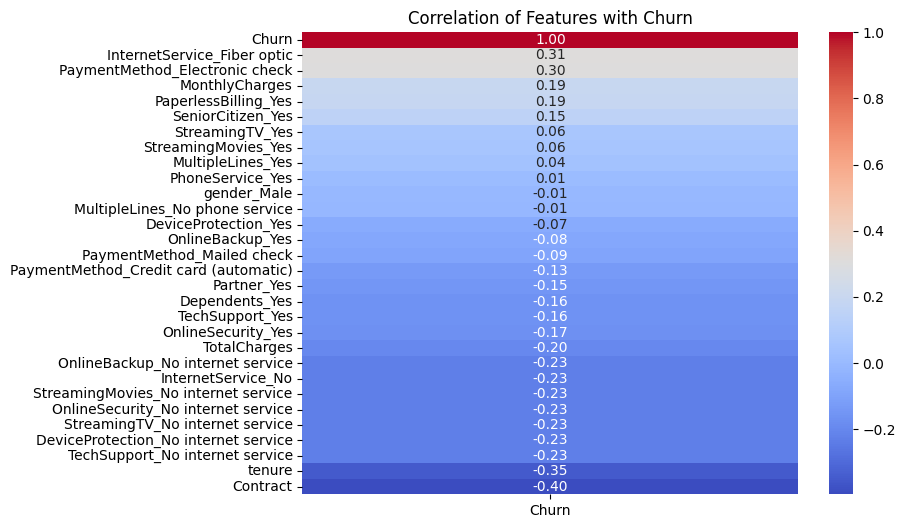

In [14]:
# Compute the correlation matrix
corr = scaled_df.corr()

# Extract correlation of 'Churn' with other features
churn_corr = corr[["Churn"]].sort_values(by="Churn", ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(churn_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation of Features with Churn')
plt.show()


## Splitting Training and Testing Data

In [15]:
X = scaled_df.drop("Churn", axis=1)
y = scaled_df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# logictic regression Model

In [16]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_pred_log_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log_proba))
report = classification_report(y_test, y_pred_log)
print(report)

Accuracy: 0.7388218594748048
ROC-AUC: 0.8413185564080705
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



# Random Forest Model

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_proba))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7721788502484032
ROC-AUC: 0.8386860936733059
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.71      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



## Prediction of Customers not yet churned

In [18]:
Unchurned_cust = scaled_df[scaled_df["Churn"]==0].drop("Churn", axis=1)

In [19]:
Churn_pred = rf_model.predict(Unchurned_cust)
Churn_pred.shape

(5174,)

In [20]:
new_churned_df = new_df[new_df["Churn"]=="No"]
customerID = new_churned_df["customerID"]
customerID.shape

(5174,)

In [ ]:
cust = pd.DataFrame(customerID)
pred = pd.DataFrame(Churn_pred, columns=["Churn"])

cust.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)

result = pd.concat([cust, pred], axis=1)
result.to_csv("D:\Projects\Teleco Customer Churn Analysis\Dataset\Result.csv", index=False)

# Pandas Profiling

In [22]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(scaled_df, title= "Telecome Customer Churn Analysis")
profile.to_file(output_file = "D:\Projects\Teleco Customer Churn Analysis\Profile\Churn_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(new_df, title= "Telecome Customer Churn Analysis")
profile.to_file(output_file = "D:\Projects\Teleco Customer Churn Analysis\Profile\Churn_profile_without encoding.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]